# Integrantes:
* Jennyfer Belalcazar Manrique
* Diego Ledesma Motta
* David barona

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Class definition

In [10]:
class pointsGenerator:
    
    def line(self, x1, y1, x2, y2, method):
        if method == 'bresenham':
            #Conditions:
            # * x1 < x2 and y1 < y2
            # * 0 < m < 1
            if (x1 > x2) or (y1 > y2) or ( (y2-y1)/(x2-x1) > 1) or ( (y2-y1)/(x2-x1) < 0):
                print("first if statement")
                raise ValueError('Invalid points for Bresenham algorithm')
            m = 2 * (y2-y1)     
            mErr = m - (x2-x1)  

            y = y1
            points = np.zeros((0,), dtype = np.int32)

            for x in range(x1, x2 + 1): 
                points = np.append(points, np.array([x, y], dtype = np.int32))
                mErr = mErr + m     
                if mErr >= 0:
                    y += 1          
                    mErr = mErr - 2 * (x2 - x1) 

            return points.reshape(-1, 2)

        if method == 'DDA':
            dx = abs(x2-x1)
            dy = abs(y2-y1)
            if(dx>dy):
                step = dx
            else:
                step = dy

            xinc = dx/step
            yinc = dy/step
            points = np.zeros((0,), dtype = np.int32)
            x = x1
            y = y1
            points = np.append(points, np.array([x, y], dtype = np.int32))
            for k in range(1,step+1):
                x = x+ xinc
                y = y+ yinc
                points = np.append(points, np.array([round(x),round(y)], dtype = np.int32))
            return points.reshape(-1, 2)



    

    def circle(self, x0, y0, r, method):
        if method == 'mid-point':
            x = r
            y = 0

            points = np.zeros((0,), dtype = np.int32)
            points = np.append(points, np.array([x0 + x, y0 + y], dtype = np.int32))
            print("first point:", points)

            if (r > 0):
                points = np.append(points, np.array([x0 + x, y0 - y], dtype = np.int32))
                points = np.append(points, np.array([x0 + y, y0 + x], dtype = np.int32))
                points = np.append(points, np.array([x0 - y, y0 + x], dtype = np.int32))

            p = 1 - r
            print("p = ", 1, " - ", r)
            print("p = ", p)

            iteration = 0

            while (x > y):
                iteration += 1 #debugging
                print("iteration:", iteration) 
                y += 1

                

                # Mid-point inside or on the perimeter
                if p <= 0:
                    print("p <= 0")
                    print("p = ",p, " + ", 2 * y, " + ", 1)
                    p = p + 2 * y + 1
                    print("p = ", p)
                    

                # Mid-point outside the perimeter
                else:
                    print("p > 0")
                    x -= 1
                    print("p = ", p, " + ", 2 * y, " - ", 2 * x, " + ", 1)
                    p = p + 2 * y - 2 * x + 1
                    print("p = ", p)

                #print("p = ", p)

                # All the perimeter points have already been printed
                if (x < y):
                    break

                # adding the generated point and its reflections
                points = np.append(points, np.array([x0 + x, y0 + y], dtype = np.int32))
                print("next point: ", points[-2:])
                points = np.append(points, np.array([x0 - x, y0 + y], dtype = np.int32))
                points = np.append(points, np.array([x0 + x, y0 - y], dtype = np.int32))
                points = np.append(points, np.array([x0 - x, y0 - y], dtype = np.int32))

                # If the generated point is on the line x = y then 
                # the perimeter points have already been added
                if (x != y):
                    points = np.append(points, np.array([x0 + y, y0 + x], dtype = np.int32))
                    #print("next point: ", points[-2:])
                    points = np.append(points, np.array([x0 - y, y0 + x], dtype = np.int32))
                    points = np.append(points, np.array([x0 + y, y0 - x], dtype = np.int32))
                    points = np.append(points, np.array([x0 - y, y0 - x], dtype = np.int32))
                
            return points.reshape(-1, 2)


# Tests

## Bresenham's Line Algorithm

In [4]:
arr0 = np.append(np.zeros((1,1), dtype = np.int32 ), np.array([3,2], dtype = np.int32))
arr1 = np.append(arr0, np.array([5,4], dtype = np.int32))
arr1

array([0, 3, 2, 5, 4])

In [4]:
plotter = pointsGenerator()
plotter.line(0,0,3,2, 'bresenham')

array([[0, 0],
       [1, 1],
       [2, 2],
       [3, 3]], dtype=int32)

In [5]:
plotter.line(3,2,15,5, 'bresenham')

array([[ 3,  2],
       [ 4,  3],
       [ 5,  3],
       [ 6,  3],
       [ 7,  3],
       [ 8,  4],
       [ 9,  4],
       [10,  4],
       [11,  4],
       [12,  5],
       [13,  5],
       [14,  5],
       [15,  5]], dtype=int32)

DDA line

In [36]:
plotter = pointsGenerator()
arr = plotter.line(3,4,7,9, 'DDA')
print(arr)

[[3 4]
 [4 5]
 [5 6]
 [5 7]
 [6 8]
 [7 9]]


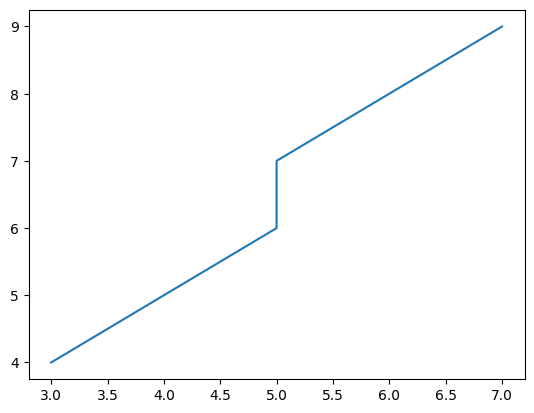

In [37]:
xList = []
yList = []

for i in range(round(arr.size/2)):
    xList.append(arr[i][0])
    yList.append(arr[i][1])


plt.plot(xList, yList)
plt.show()


## mid-point circle drawing algorithm

In [5]:
pointsGen = pointsGenerator()
pointsGen.circle(0,0,3, 'mid-point')

first point: [3 0]
p =  1  -  3
p =  -2
iteration: 1
p <= 0
p =  -2  +  2  +  1
p =  1
next point:  [3 1]
iteration: 2
p > 0
p =  1  +  4  -  4  +  1
p =  2
next point:  [2 2]


array([[ 3,  0],
       [ 3,  0],
       [ 0,  3],
       [ 0,  3],
       [ 3,  1],
       [-3,  1],
       [ 3, -1],
       [-3, -1],
       [ 1,  3],
       [-1,  3],
       [ 1, -3],
       [-1, -3],
       [ 2,  2],
       [-2,  2],
       [ 2, -2],
       [-2, -2]])

In [79]:
pointsGen.circle(3,5,5, 'mid-point')

first point: [8 5]
p =  1  -  5
p =  -4
iteration: 1
p <= 0
p =  -4  +  2  +  1
p =  -1
next point:  [8 6]
iteration: 2
p <= 0
p =  -1  +  4  +  1
p =  4
next point:  [8 7]
iteration: 3
p > 0
p =  4  +  6  -  8  +  1
p =  3
next point:  [7 8]
iteration: 4
p > 0
p =  3  +  8  -  6  +  1
p =  6


array([[ 8,  5],
       [ 8,  5],
       [ 3, 10],
       [ 3, 10],
       [ 8,  6],
       [-2,  6],
       [ 8,  4],
       [-2,  4],
       [ 4, 10],
       [ 2, 10],
       [ 4,  0],
       [ 2,  0],
       [ 8,  7],
       [-2,  7],
       [ 8,  3],
       [-2,  3],
       [ 5, 10],
       [ 1, 10],
       [ 5,  0],
       [ 1,  0],
       [ 7,  8],
       [-1,  8],
       [ 7,  2],
       [-1,  2],
       [ 6,  9],
       [ 0,  9],
       [ 6,  1],
       [ 0,  1]], dtype=int32)

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

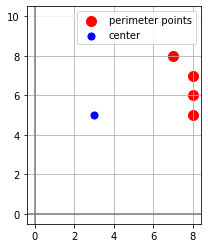

In [124]:
firstOctPoints = np.array([[8,5], [8,6], [8,7], [7,8]])

fig,  ax = plt.subplots()
#ax.spines['top'].set_position(('data',15))
#ax.spines['left'].set_position(('data',0))
ax.scatter(firstOctPoints[:,0], firstOctPoints[:,1], s = 100, color = 'red', label = 'perimeter points')
ax.scatter([3], [5], s = 50, color = 'blue', label = 'center')
plt.grid()
ax.set_aspect('equal')
ax.axhline(y=0, color='gray')
ax.axhline(y = 10, color = 'white')
ax.axvline(x=0, color='gray')
plt.legend()
plt.show()